In [107]:
import pandas as pd
from datetime import date, datetime
import matplotlib 
import os

In [2]:
main_folder = os.path.dirname(os.getcwd())
main_folder

'/Users/fipm/OneDrive/GitHubProjects/bitcoin_trend'

In [98]:

monthly_data = pd.read_csv(os.path.join(main_folder,'raw_data','monthly_data.csv'))
weekly_data = pd.read_csv(os.path.join(main_folder,'raw_data','weekly_data.csv'))
hourly_data = pd.read_csv(os.path.join(main_folder,'raw_data','hourly_data.csv'))

monthly_data['year'] = monthly_data['date'].apply(lambda x: date.fromisoformat(x).year)
monthly_data['month'] = monthly_data['date'].apply(lambda x: date.fromisoformat(x).month)
monthly_data['value_month']=monthly_data['value_month']/100

weekly_data['year'] = weekly_data['date'].apply(lambda x: date.fromisoformat(x).year)
weekly_data['month'] = weekly_data['date'].apply(lambda x: date.fromisoformat(x).month)
weekly_data['week'] = weekly_data['date'].apply(lambda x: date.fromisoformat(x).day)
weekly_data['iso_year'] = weekly_data['date'].apply(lambda x: date.fromisoformat(x).isocalendar()[0])
weekly_data['iso_week'] = weekly_data['date'].apply(lambda x: date.fromisoformat(x).isocalendar()[1])
weekly_data['value_week']=weekly_data['value_week']/100


hourly_data['year'] = hourly_data['date'].apply(lambda x: date.fromisoformat(x.split(' ')[0]).year)
hourly_data['month'] = hourly_data['date'].apply(lambda x: date.fromisoformat(x.split(' ')[0]).month)
hourly_data['iso_year'] = hourly_data['date'].apply(lambda x: date.fromisoformat(x.split(' ')[0]).isocalendar()[0])
hourly_data['iso_week'] = hourly_data['date'].apply(lambda x: date.fromisoformat(x.split(' ')[0]).isocalendar()[1])
hourly_data['value_hour']=hourly_data['value_hour']/100

hourly_data


,time_hour,value_hour,date,year,month,iso_year,iso_week
0,1483228800,0.30,2017-01-01 00:00:00,2017,1,2016,52
1,1483232400,0.34,2017-01-01 01:00:00,2017,1,2016,52
2,1483236000,0.33,2017-01-01 02:00:00,2017,1,2016,52
3,1483239600,0.43,2017-01-01 03:00:00,2017,1,2016,52
4,1483243200,0.32,2017-01-01 04:00:00,2017,1,2016,52
...,...,...,...,...,...,...,...
49475,1661378400,0.90,2022-08-24 22:00:00,2022,8,2022,34
49476,1661382000,0.81,2022-08-24 23:00:00,2022,8,2022,34
49477,1661385600,0.77,2022-08-25 00:00:00,2022,8,2022,34
49478,1661389200,0.75,2022-08-25 01:00:00,2022,8,2022,34


In [70]:
db_n_m_y_monthly = monthly_data[['year','month','value_month']].rename(columns={'value_month':'n_m_y_montly'})
db_n_m_y_monthly

,year,month,n_m_y_montly
0,2017,1,0.06
1,2017,2,0.06
2,2017,3,0.07
3,2017,4,0.06
4,2017,5,0.15
...,...,...,...
63,2022,4,0.23
64,2022,5,0.34
65,2022,6,0.41
66,2022,7,0.30


In [87]:

db_n_m_y = weekly_data.groupby(['year','month'])[['value_week']].sum().rename(columns={'value_week':'sum_value_week'}).reset_index(drop=False)
db_n_m_y['n_w_m_y'] = db_n_m_y['sum_value_week']
db_n_m_y = db_n_m_y[['year','month','n_w_m_y']]

db_n_w_m_y_montly = weekly_data.merge(db_n_m_y.merge(db_n_m_y_monthly, how='left', left_on=['year','month'], right_on=['year','month']),
                  how='left', left_on=['year','month'], right_on=['year','month'])
db_n_w_m_y_montly['n_w_m_y_montly'] = db_n_w_m_y_montly['value_week']/db_n_w_m_y_montly['n_w_m_y']*db_n_w_m_y_montly['n_m_y_montly']
db_n_w_m_y_montly = db_n_w_m_y_montly[['iso_year','iso_week','n_w_m_y_montly']]
db_n_w_m_y_montly.head(20)

,iso_year,iso_week,n_w_m_y_montly
0,2016,52,0.016529
1,2017,1,0.013884
2,2017,2,0.010413
3,2017,3,0.009256
4,2017,4,0.009917
5,2017,5,0.014043
6,2017,6,0.012766
7,2017,7,0.015319
8,2017,8,0.017872
9,2017,9,0.020514


In [101]:
db_n_w_m_y = hourly_data.groupby(['iso_year','iso_week'])[['value_hour']].sum().rename(columns={'value_hour':'n_w_m_y'}).reset_index(drop=False)

db_n_h_d_w_m_y = hourly_data.merge(
                  db_n_w_m_y.merge(db_n_w_m_y_montly, how='left', left_on=['iso_year','iso_week'], right_on=['iso_year','iso_week']),
                  how='left', left_on=['iso_year','iso_week'], right_on=['iso_year','iso_week'])

db_n_h_d_w_m_y['n_h_d_w_m_y_monthly'] = db_n_h_d_w_m_y['value_hour']/db_n_h_d_w_m_y['n_w_m_y']*db_n_h_d_w_m_y['n_w_m_y_montly']
db_n_h_d_w_m_y['n_h_d_w_m_y'] = 100*db_n_h_d_w_m_y['n_h_d_w_m_y_monthly']/db_n_h_d_w_m_y['n_h_d_w_m_y_monthly'].max()
# db_n_h_d_w_m_y.dropna(inplace=True)
db_n_h_d_w_m_y = db_n_h_d_w_m_y[['time_hour','date','n_h_d_w_m_y']]

# There are some missing values because the weekly_data and hourly_data do not have the same number of iso weeks. 

db_n_h_d_w_m_y



,time_hour,date,n_h_d_w_m_y
0,1483228800,2017-01-01 00:00:00,16.477506
1,1483232400,2017-01-01 01:00:00,18.674507
2,1483236000,2017-01-01 02:00:00,18.125257
3,1483239600,2017-01-01 03:00:00,23.617759
4,1483243200,2017-01-01 04:00:00,17.576007
...,...,...,...
49475,1661378400,2022-08-24 22:00:00,NaN
49476,1661382000,2022-08-24 23:00:00,NaN
49477,1661385600,2022-08-25 00:00:00,NaN
49478,1661389200,2022-08-25 01:00:00,NaN


In [102]:
print(db_n_h_d_w_m_y['n_h_d_w_m_y'].max())
print(db_n_h_d_w_m_y['n_h_d_w_m_y'].mean())
print(db_n_h_d_w_m_y['n_h_d_w_m_y'].std())

100.0
9.89968120635563
8.231718616102825


<AxesSubplot:xlabel='date'>

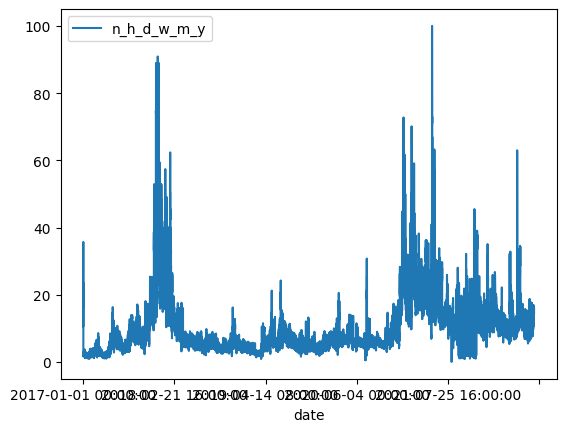

In [109]:
db_n_h_d_w_m_y.plot.line(x='date', y='n_h_d_w_m_y')